Natural Language Processing (NLP) is a rapidly growing field that has the potential to revolutionize the way we interact with computers. One exciting application of NLP is the conversion of natural language text to SQL commands, which can enable users to interact with databases using everyday language. In this post, I will explore the use of OpenAI's API model to generate SQL commands from natural language text in Python. I will provide a step-by-step guide on how to implement it. By the end of the post, you will have a better understanding of how NLP and OpenAI can be leveraged to make working with databases more accessible and intuitive.

For this project, I will use Google Colab Python notebook to see outputs immediately, connect to a sqlite database automatically created in Colab memory, and finally OpenAI API to convert text to SQL commands. Let's start with the imports. 

In [ ]:
#pip install openai
#Run the above command if OpenAI is not intalled already. 
import openai
import os
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import text
import urllib.parse
urllib.parse.quote_plus("123")

'123'

Then we need to get API key from OpenAI website. First, signup for OpenAI if you have not already and enter the billing information. I will write another post about OpenAI pricing but for the projects I 'll write about, the cost is very low. (Unless you run your Jupyter notebooks over and over again, so be careful:))

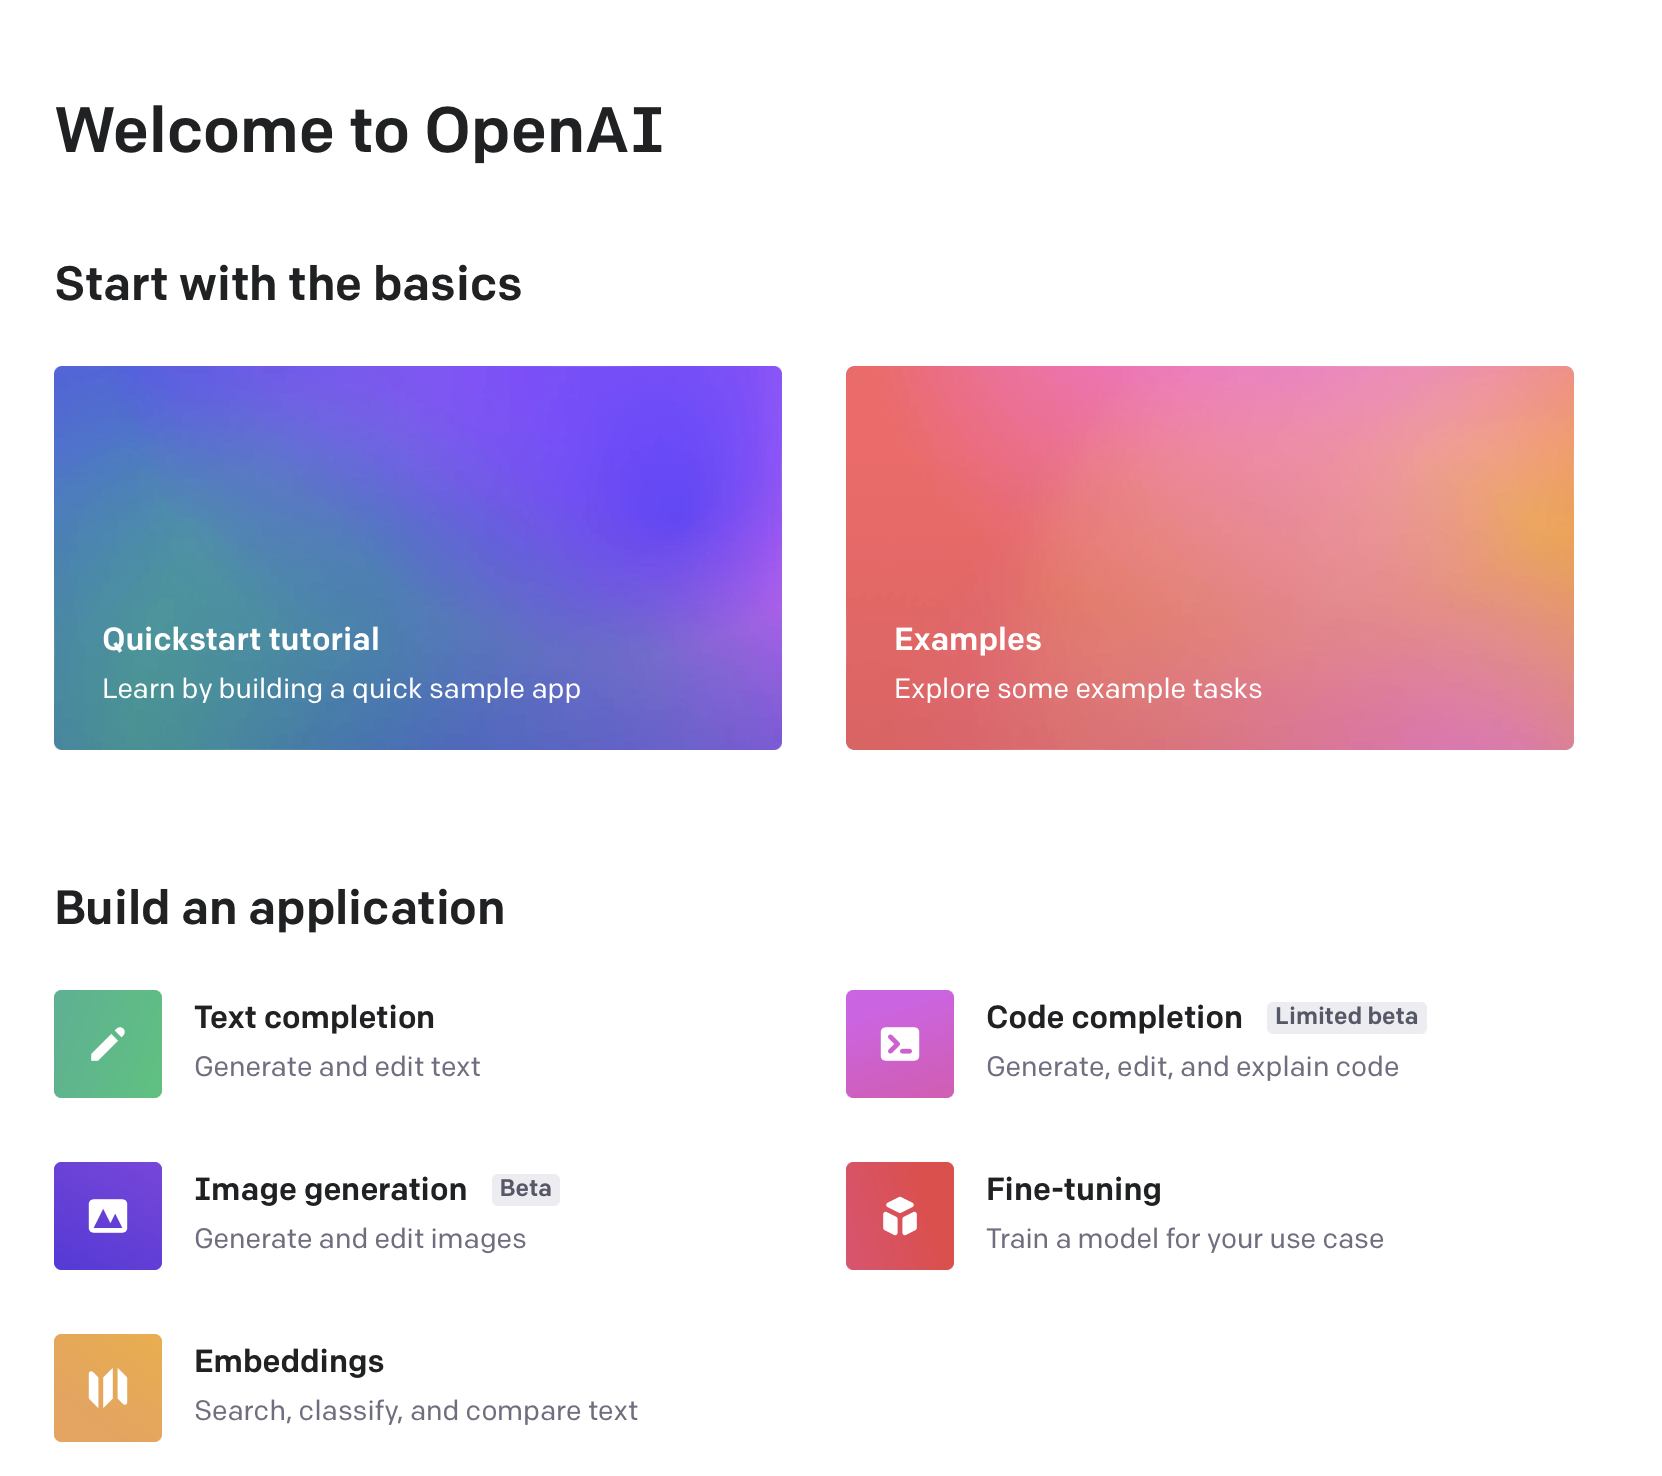

When you complete signup, you will land this page. Here you see OpenAI offers 5 methods to build an application. These are:
Text completion: Generates the most likely continuation of a given input text.

Code completion: Predicts the next most likely lines of code based on a given code snippet.

Image generation: Generates images based on a textual description or a partial image.

Fine-tuning: Customizes pre-trained models by training them on new data or fine-tuning their parameters.

Embeddings: Maps words or phrases to numerical vectors in a high-dimensional space, allowing for semantic relationships to be modeled between words.

In this project, we will use "Text Completion" to convert our written queries into a form that a SQL engine can understand. 

Then, click on the top right corner of screen and "View API Keys". Click "Create new secret key" and copy immediately. You will not have access to this API again, so keep it somewhere secure and never share with anyone.  

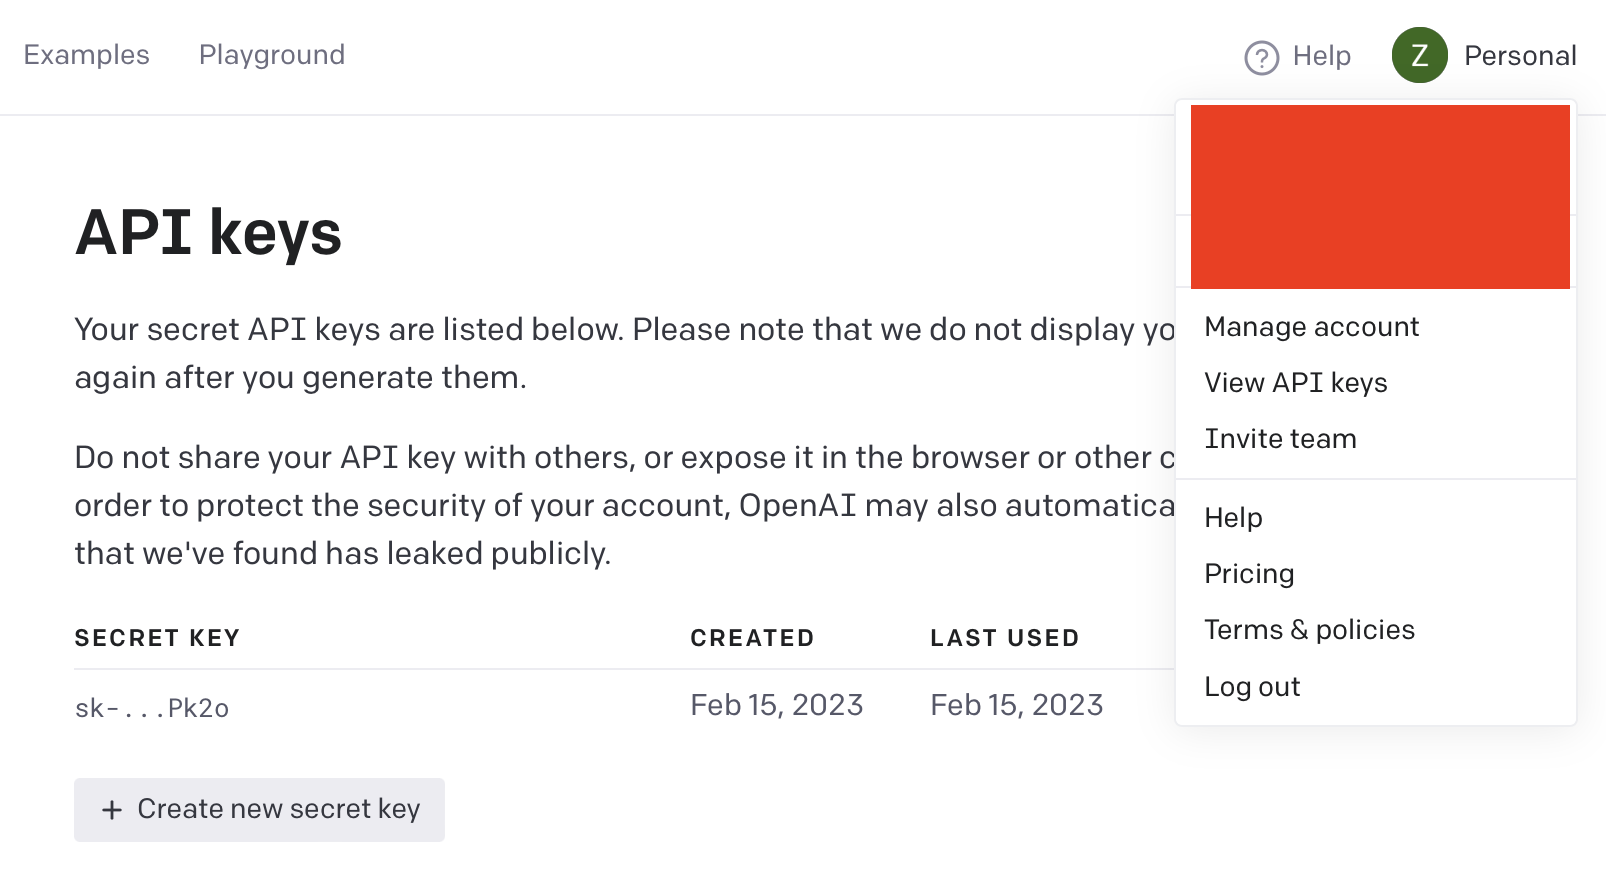

Now, going back to our Colab notebook, if I run the following commands, the code will set the value of the environment variable 'OPENAI_API_KEY' to 'YOUR SECRET API KEY' using the os module, and then retrieve the same value using the os.getenv() method, assigning it to the openai.api_key variable. By this way, I managed to securely store and use authentication credentials needed to access OpenAI's API.

In [ ]:
#You should replace 'YOUR SECRET API KEY' with the one you copied from OpenAI website.
os.environ['OPENAI_API_KEY']='YOUR SECRET API KEY'

In [ ]:
openai.api_key=os.getenv('OPENAI_API_KEY')

Then, we will download Sales Data from this [link](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data) and read into sales dataframe. 

In [ ]:
sales=pd.read_csv('sales_data_sample.csv')
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai
1,10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul
2,10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel
3,10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie
4,10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,Brown,Julie


Next step is creating a sqlite engine where I will store the sales dataframe. The code will create an in-memory SQLite database using the create_engine() method from the SQLAlchemy library and assign it to the temp_db variable. The 'sqlite:///:memory' argument specifies that the database should be created in memory rather than on disk, and the 'echo=True' argument enables logging of SQL statements executed against the database. 

In [ ]:
temp_db=create_engine('sqlite:///:memory',echo=True)

Now, let's write the data stored in the Sales dataframe to an SQLite database using the to_sql() method. The 'name' argument will specify the name of the table to be created in the database, which is Sales in this case, and the 'con' argument specifies the connection to the database, which is 'temp_db'. 

In [ ]:
data=sales.to_sql(name='Sales',con=temp_db)

2023-02-15 21:07:14,124 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Sales")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Sales")


2023-02-15 21:07:14,129 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-02-15 21:07:14,133 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Sales")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("Sales")


2023-02-15 21:07:14,136 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-02-15 21:07:14,145 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-02-15 21:07:14,152 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Sales" (
	"index" BIGINT, 
	"ORDERNUMBER" BIGINT, 
	"QUANTITYORDERED" BIGINT, 
	"PRICEEACH" FLOAT, 
	"SALES" FLOAT, 
	"ORDERDATE" TEXT, 
	"QTR_ID" BIGINT, 
	"MONTH_ID" BIGINT, 
	"YEAR_ID" BIGINT, 
	"PRODUCTLINE" TEXT, 
	"PHONE" TEXT, 
	"ADDRESSLINE1" TEXT, 
	"CITY" TEXT, 
	"STATE" TEXT, 
	"POSTALCODE" TEXT, 
	"COUNTRY" TEXT, 
	"CONTACTLASTNAME" TEXT, 
	"CONTACTFIRSTNAME" TEXT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Sales" (
	"index" BIGINT, 
	"ORDERNUMBER" BIGINT, 
	"QUANTITYORDERED" BIGINT, 
	"PRICEEACH" FLOAT, 
	"SALES" FLOAT, 
	"ORDERDATE" TEXT, 
	"QTR_ID" BIGINT, 
	"MONTH_ID" BIGINT, 
	"YEAR_ID" BIGINT, 
	"PRODUCTLINE" TEXT, 
	"PHONE" TEXT, 
	"ADDRESSLINE1" TEXT, 
	"CITY" TEXT, 
	"STATE" TEXT, 
	"POSTALCODE" TEXT, 
	"COUNTRY" TEXT, 
	"CONTACTLASTNAME" TEXT, 
	"CONTACTFIRSTNAME" TEXT
)




2023-02-15 21:07:14,156 INFO sqlalchemy.engine.Engine [no key 0.00386s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00386s] ()


2023-02-15 21:07:14,176 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Sales_index" ON "Sales" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Sales_index" ON "Sales" ("index")


2023-02-15 21:07:14,179 INFO sqlalchemy.engine.Engine [no key 0.00277s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00277s] ()


2023-02-15 21:07:14,195 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-02-15 21:07:14,208 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-02-15 21:07:14,292 INFO sqlalchemy.engine.Engine INSERT INTO "Sales" ("index", "ORDERNUMBER", "QUANTITYORDERED", "PRICEEACH", "SALES", "ORDERDATE", "QTR_ID", "MONTH_ID", "YEAR_ID", "PRODUCTLINE", "PHONE", "ADDRESSLINE1", "CITY", "STATE", "POSTALCODE", "COUNTRY", "CONTACTLASTNAME", "CONTACTFIRSTNAME") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO "Sales" ("index", "ORDERNUMBER", "QUANTITYORDERED", "PRICEEACH", "SALES", "ORDERDATE", "QTR_ID", "MONTH_ID", "YEAR_ID", "PRODUCTLINE", "PHONE", "ADDRESSLINE1", "CITY", "STATE", "POSTALCODE", "COUNTRY", "CONTACTLASTNAME", "CONTACTFIRSTNAME") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-02-15 21:07:14,297 INFO sqlalchemy.engine.Engine [generated in 0.05864s] ((0, 10107, 30, 95.7, 2871.0, '2/24/2003 0:00', 1, 2, 2003, 'Motorcycles', '2125557818', '897 Long Airport Avenue', 'NYC', 'NY', '10022', 'USA', 'Yu', 'Kwai'), (1, 10121, 34, 81.35, 2765.9, '5/7/2003 0:00', 2, 5, 2003, 'Motorcycles', '26.47.1555', "59 rue de l'Abbaye", 'Reims', None, '51100', 'France', 'Henriot', 'Paul'), (2, 10134, 41, 94.74, 3884.34, '7/1/2003 0:00', 3, 7, 2003, 'Motorcycles', '+33 1 46 62 7555', '27 rue du Colonel Pierre Avia', 'Paris', None, '75508', 'France', 'Da Cunha', 'Daniel'), (3, 10145, 45, 83.26, 3746.7, '8/25/2003 0:00', 3, 8, 2003, 'Motorcycles', '6265557265', '78934 Hillside Dr.', 'Pasadena', 'CA', '90003', 'USA', 'Young', 'Julie'), (4, 10159, 49, 100.0, 5205.27, '10/10/2003 0:00', 4, 10, 2003, 'Motorcycles', '6505551386', '7734 Strong St.', 'San Francisco', 'CA', None, 'USA', 'Brown', 'Julie'), (5, 10168, 36, 96.66, 3479.76, '10/28/2003 0:00', 4, 10, 2003, 'Motorcycles', '6505

INFO:sqlalchemy.engine.Engine:[generated in 0.05864s] ((0, 10107, 30, 95.7, 2871.0, '2/24/2003 0:00', 1, 2, 2003, 'Motorcycles', '2125557818', '897 Long Airport Avenue', 'NYC', 'NY', '10022', 'USA', 'Yu', 'Kwai'), (1, 10121, 34, 81.35, 2765.9, '5/7/2003 0:00', 2, 5, 2003, 'Motorcycles', '26.47.1555', "59 rue de l'Abbaye", 'Reims', None, '51100', 'France', 'Henriot', 'Paul'), (2, 10134, 41, 94.74, 3884.34, '7/1/2003 0:00', 3, 7, 2003, 'Motorcycles', '+33 1 46 62 7555', '27 rue du Colonel Pierre Avia', 'Paris', None, '75508', 'France', 'Da Cunha', 'Daniel'), (3, 10145, 45, 83.26, 3746.7, '8/25/2003 0:00', 3, 8, 2003, 'Motorcycles', '6265557265', '78934 Hillside Dr.', 'Pasadena', 'CA', '90003', 'USA', 'Young', 'Julie'), (4, 10159, 49, 100.0, 5205.27, '10/10/2003 0:00', 4, 10, 2003, 'Motorcycles', '6505551386', '7734 Strong St.', 'San Francisco', 'CA', None, 'USA', 'Brown', 'Julie'), (5, 10168, 36, 96.66, 3479.76, '10/28/2003 0:00', 4, 10, 2003, 'Motorcycles', '6505556809', '9408 Furth Cir

2023-02-15 21:07:14,320 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-02-15 21:07:14,346 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2023-02-15 21:07:14,352 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Now let's create a side function to generate a prompt string that describes the table schema and can be passed to OpenAI's GPT-3 model for text generation.

In [ ]:
def create_table_definition(df):
  prompt="""### sqlite SQL table, with its properties:
  #
  # Sales({})
  #
  """.format(",".join(str(col) for col in df.columns))
  return prompt

In [ ]:
print(create_table_definition(sales))

### sqlite SQL table, with its properties:
  #
  # Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME)
  #
  


The prompt is the most crucial aspect in determining what a language model will return as it attempts to complete your text. Therefore, it's essential to get the prompt right to achieve the desired output. However, it can be challenging to craft the perfect prompt, and it may require some experimentation to find the best one. Fortunately, you can take advantage of resources such as OpenAI's playground, which provides a text editor to help you play around with different prompts and see how they impact the model's output. Moreover, you can analyze the log probabilities of specific words and adjust other parameters to fine-tune the model's behavior.

It's also a good practice to search for existing prompts online, as there are numerous GitHub repositories available for various use cases. For instance, if you're creating a tutor bot, you can find prompts that are ideal for teaching specific subjects. By providing the model with a prompt that mimics the best teacher in the world and asks it to explain a particular topic, you can obtain an output that matches your requirements. Therefore, with some effort and the right resources, you can master the art of crafting the perfect prompt to get the desired results from your language model.

First, I will define a function called 'prompt_input' that prompts the user to enter information and returns it as a string. This will be the plain english version of SQL query. 

In [ ]:
def prompt_input():
  nlp_text=input("Enter the info you want:")
  return nlp_text
prompt_input()

Enter the info you want:Average SALES per ZIPCODE


'Average SALES per ZIPCODE'

Then, I'll define a function called 'combine_prompts' that takes two parameters, a dataframe object 'df' and a string 'query_prompt'. The function will generate a table definition prompt string using the 'create_table_definition' function, and a query prompt string using the 'query_prompt' parameter. It then concatenates the two prompt strings and returns the result.

In [ ]:
def combine_prompts(df,query_prompt):
  definition=create_table_definition(df)
  query_init_string=f"### A query to answer: {query_prompt}\n SELECT"
  return definition+query_init_string

Finally, following code will create the 'sales' dataframe, prompt the user to enter information using the 'prompt_input' function, and print the result of calling 'combine_prompts' with the 'sales' DataFrame and the user's input as parameters. The resulting output is a concatenated string that describes the table schema and a prompt for a query that can be used as input for OpenAI's GPT-3 model for text generation.

In [ ]:
nlp_text=prompt_input()
print(combine_prompts(sales,nlp_text))

Enter the info you want:Average SALES per ZIPCODE
### sqlite SQL table, with its properties:
  #
  # Sales(ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME)
  #
  ### A query to answer: Average SALES per ZIPCODE
 SELECT


That's it. We are ready to get our answer from OpenAI. But first, I want to talk about remaining parameters of the model. I already talked about prompt, which is the most important parameter to get quality results, now let's take a look at temperature. 

The temperature parameter is a crucial aspect of the OpenAI model that determines the level of risk-taking in generating responses. Setting higher values for temperature encourages the model to produce more creative and unpredictable results, while setting the value to zero performs ARG max sampling, which always chooses the word with the highest probability. The optimal value for temperature varies depending on the task and the desired output. For simpler tasks with clear answers, such as converting natural language to a SQL query, a low temperature is preferred to minimize the risk of generating an incorrect response. However, for creative applications, such as writing a horror movie script, a higher temperature may be more suitable to encourage the model to generate unique and unexpected results. Ultimately, finding the right balance between risk-taking and accuracy is critical to achieving the desired outcomes.

The Max token parameter specifies the maximum number of tokens that the model generates in response to a prompt. The total number of tokens, which includes the tokens from the prompt, cannot exceed the context length of the model. Most models have a context length of 2048 tokens, while the latest models support a context length of up to 4096 tokens, which is sometimes reported as 4000 in the documentation. However, it's important to note that the number of tokens is limited by the context length, and exceeding this limit will result in a Max token error. Therefore, it's essential to keep in mind the number of tokens used in the prompt and adjust the Max token parameter accordingly to get the desired results. Passing in an excessively long prompt may cause the model to fail to generate a response, so it's crucial to strike a balance between the prompt's length and the maximum number of tokens to generate.

The Top P parameter is an alternative to the temperature parameter, which uses nucleus sampling to determine the tokens to consider. When using Top P, the model only considers the tokens with the highest probability mass up to a certain threshold, expressed as a fraction of the total probability mass. For example, setting Top P to 0.1 means that only the tokens comprising the top 10% of the probability mass are considered. Some people prefer using Top P over temperature for sampling, and it's important to note that it's best to adjust either Top P or temperature, but not both, as doing so would be redundant. Experimenting with temperature values between 0 and 1 can produce varying degrees of risk-taking and creativity in the generated responses. Conversely, adjusting Top P allows one to consider a larger or smaller fraction of the probability mass when selecting tokens. Therefore, it's important to choose either Top P or temperature based on personal preference and the desired outcome, rather than using both simultaneously.

The N parameter determines the number of completions to generate for each prompt, essentially equivalent to running the same prompt multiple times. It's important to keep in mind that generating multiple completions for the same prompt can consume token quota quickly, leading to additional costs. The default value for N is one, and it's recommended to keep it as such to avoid incurring unnecessary expenses. However, if desired, N can be set to a higher value when using a temperature value greater than zero, as generating multiple completions with a higher temperature value would increase the chances of getting unique and diverse results. It's important to note that when N is set to a higher value with a temperature value of zero, it's likely to generate repetitive results. I'll leave N as default in the projects, which is 1. 

Next two parameters are similar to each other in context but performing the opposite functions. The frequency penalty parameter is useful in preventing repetition of the same tokens in OpenAI completions. In some cases, the model may get stuck in a loop, repeatedly generating the same or similar phrases. By inducing a frequency penalty, the model is less likely to repeat itself verbatim. The frequency penalty ranges from -2 to 2, with positive values penalizing new tokens based on their existing frequency in the text. Conversely, the presence penalty parameter ranges from -2 to 2 but penalizes new tokens based on whether they appear in the text so far, increasing the model's likelihood to discuss new topics. It's important to note that excessively high values for both parameters can lead to the model generating low probability and off-topic responses. Reasonable values for the penalty coefficients range from 0.1 to 1, with higher values being used to strongly suppress repetition. Negative values can be used to increase the likelihood of repetition, although this isn't commonly used. It's important to experiment with different values of the frequency and presence penalties to strike the right balance between creativity and avoiding repetition.

Finally, we can use stop sequences like semicolons to signal the end of a SQL query, so that the model knows when to stop generating tokens. This will be helpful as we move forward in developing SQL queries.

In OpenAI playground, we can experiment with the various modes of operating the GPT models and adjust all of these parameters such as temperature and maximum length stop sequences, which can be useful in generating natural language text.

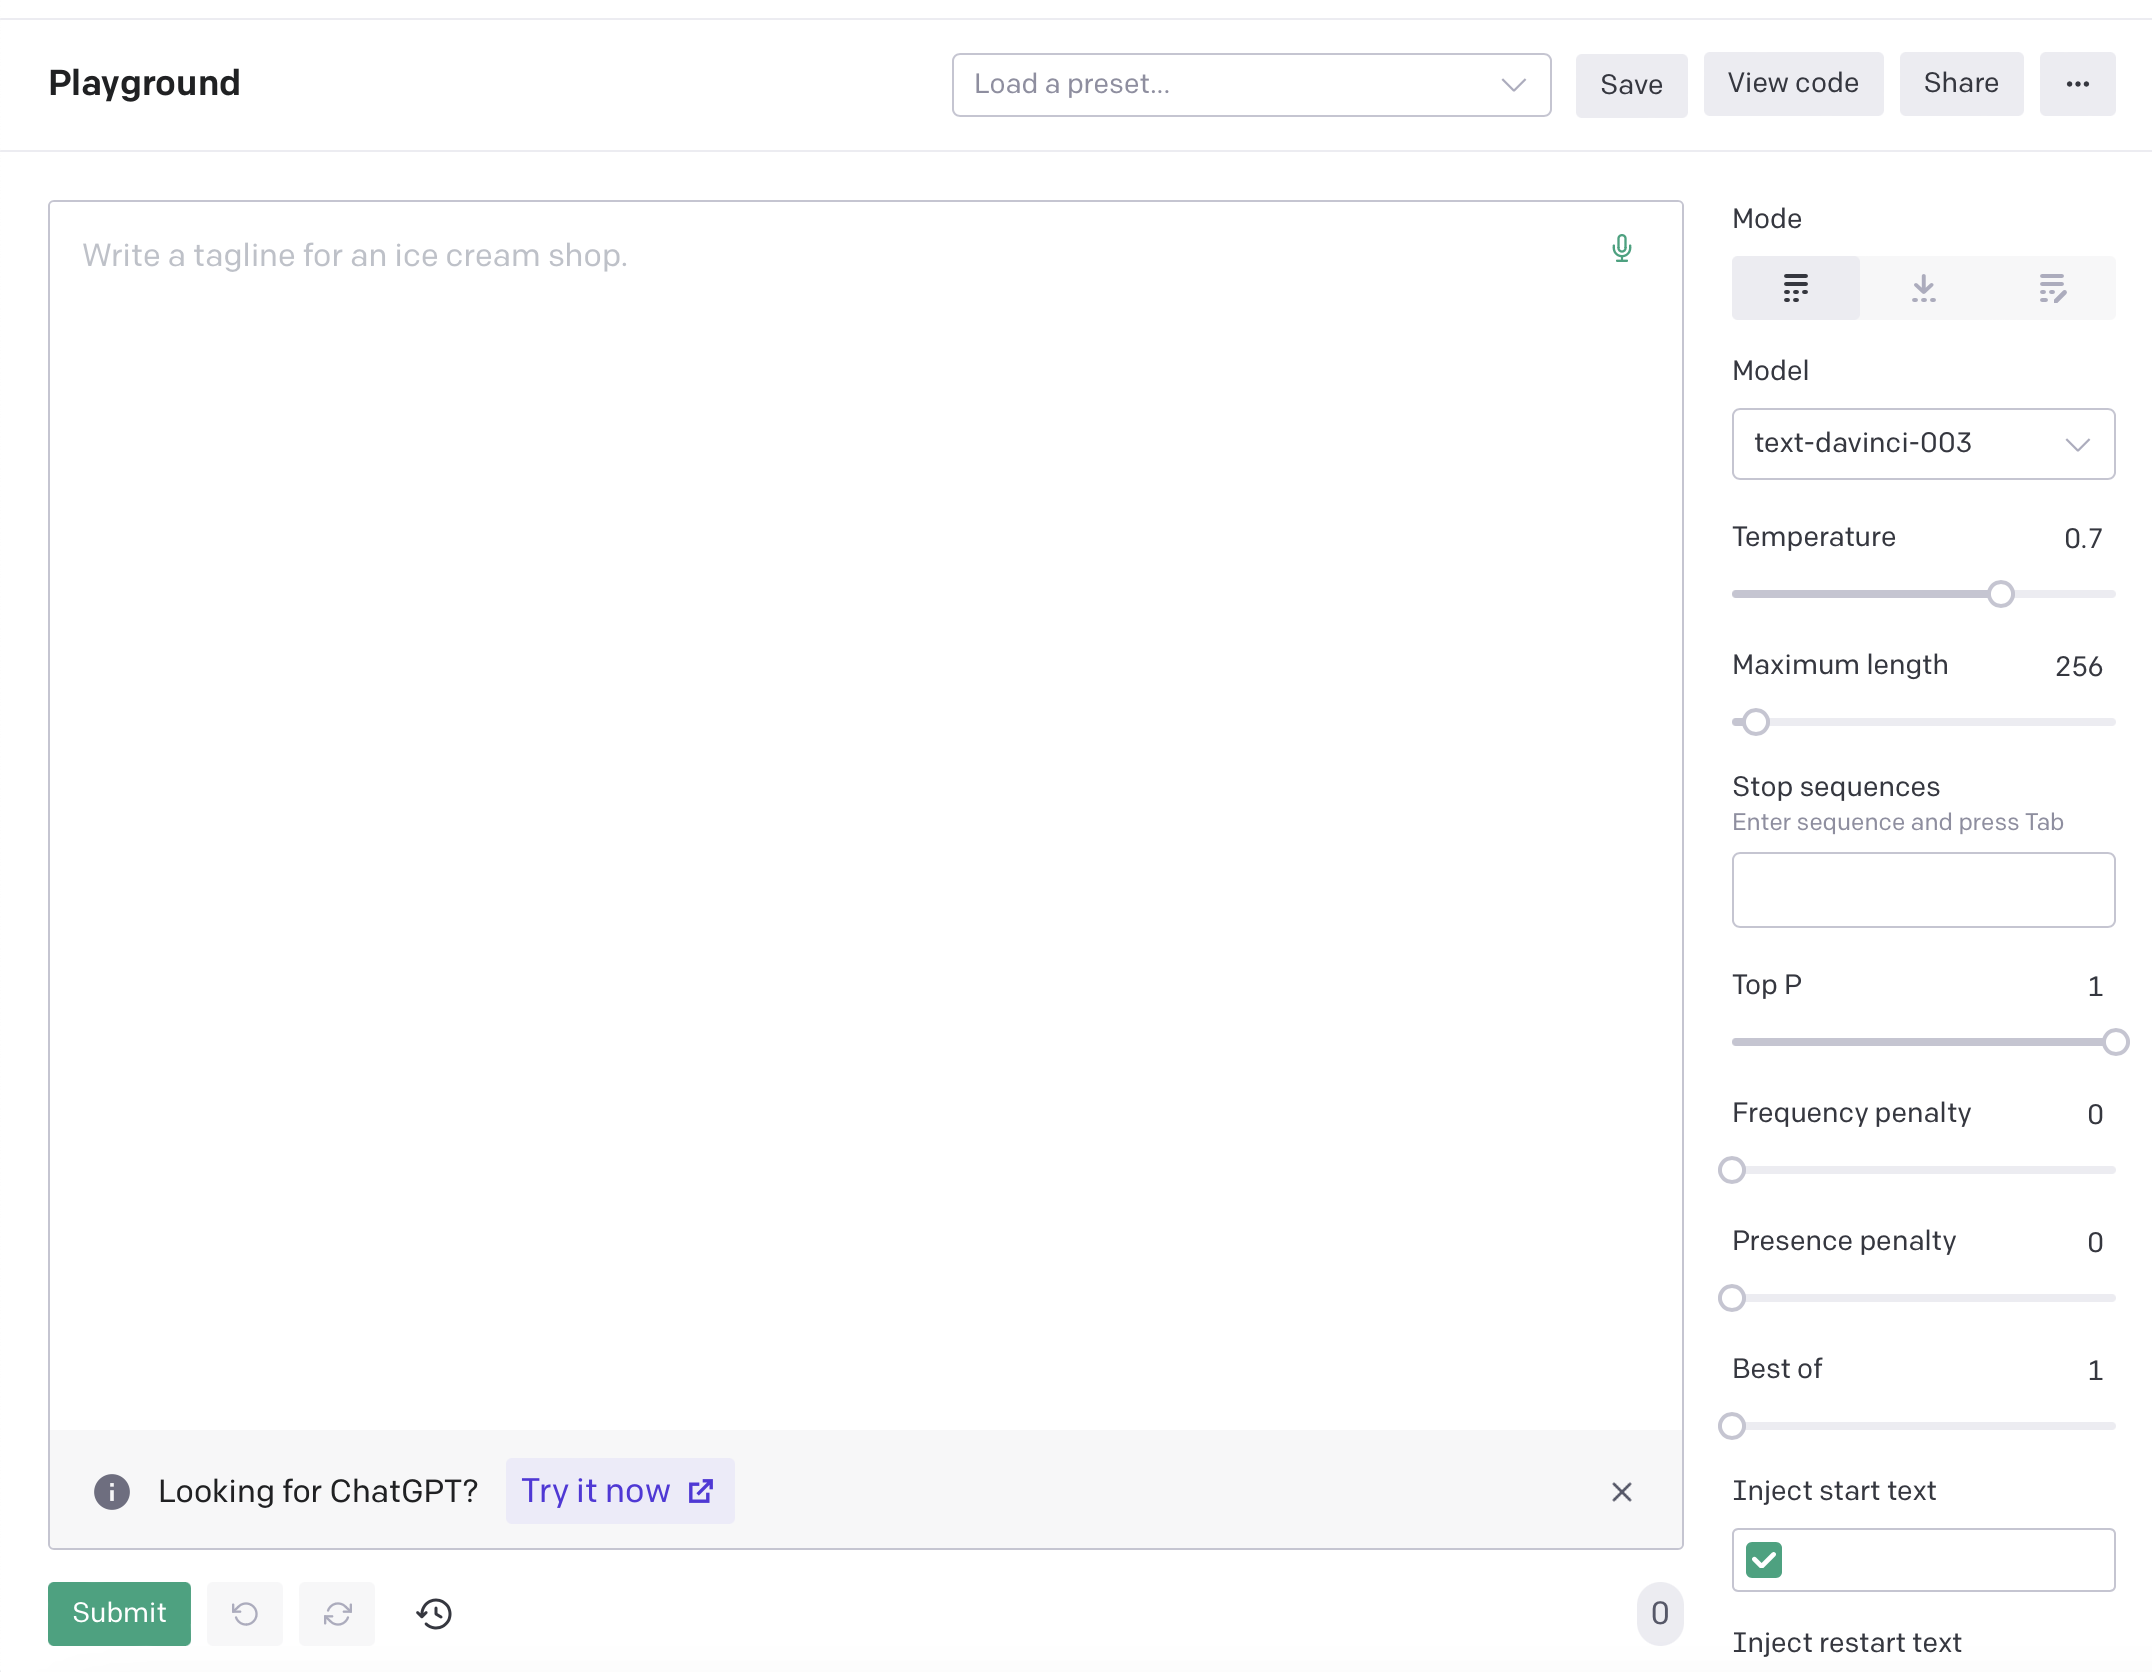

Ok, now it is time to get our response from OpenAI. In the following code, I will use OpenAI's Completion API to generate natural language text based on the given parameters.

The model parameter specifies the GPT model to be used, in this case it is code-davinci-002.

The prompt parameter is the combination of the table definition and query prompt that we created earlier.

The temperature parameter is set to 0, which means that the model will always choose the token with the highest probability.

The max_tokens parameter specifies the maximum number of tokens to generate in the completion. In this case, it is set to 150.

The top_p parameter is set to 1.0, which means the model considers the results of all the tokens with probability mass, not just the top ones.

The frequency_penalty and presence_penalty parameters are both set to 0, which means that the model won't penalize new tokens based on their frequency or appearance in the text so far.

The stop parameter is a list of tokens where the API should stop generating tokens. In this case, it is set to ['#', ';'], which means that the API should stop generating tokens if it encounters a hash or semicolon, which are common stop sequences in SQL queries.



In [ ]:
response=openai.Completion.create(
    model='code-davinci-002',
    prompt=combine_prompts(sales,nlp_text),
    temperature=0,
    max_tokens=150,
    top_p=1.0,
    frequency_penalty=0,
    presence_penalty=0,
    stop=['#',';']
)

One last step is handling the response. For this, I created the function handle_response which takes in a response from OpenAI's API and extracts the generated text from it. It then checks if the text starts with a space and if so, adds "SELECT" to the beginning of the text before returning the final query.

In [ ]:
def handle_response(response):
  query=response['choices'][0]['text']
  if query.startswith(" "):
    query="SELECT"+query
    return query

In [ ]:
handle_response(response)

'SELECT AVG(SALES) AS AVG_SALES, POSTALCODE\n FROM Sales\n GROUP BY POSTALCODE\n ORDER BY AVG_SALES DESC\n LIMIT 10'

Finally, we can execute the response obtained from the OpenAI API using the provided prompt on the temporary SQLite database created earlier. The handle_response function will extract the SQL query text from the API response and add a SELECT statement in case it's missing. The text function from sqlalchemy will be used to convert the query text to a SQL expression, which will be then executed using conn.execute(). The results will be fetched and stored in the result variable.

In [ ]:
with temp_db.connect() as conn:
  result=conn.execute(text(handle_response(response))).fetchall()

2023-02-15 21:07:44,126 INFO sqlalchemy.engine.Engine SELECT AVG(SALES) AS AVG_SALES, POSTALCODE
 FROM Sales
 GROUP BY POSTALCODE
 ORDER BY AVG_SALES DESC
 LIMIT 10


INFO:sqlalchemy.engine.Engine:SELECT AVG(SALES) AS AVG_SALES, POSTALCODE
 FROM Sales
 GROUP BY POSTALCODE
 ORDER BY AVG_SALES DESC
 LIMIT 10


2023-02-15 21:07:44,134 INFO sqlalchemy.engine.Engine [generated in 0.00834s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00834s] ()


Here we can see the average sales per zip code. 

In [ ]:
print(result)

[(4674.827647058824, '97823'), (4233.604210526316, '67000'), (4226.24695652174, '75012'), (4180.0125, 'B-6000'), (4069.250689655172, 'WX1 6LT'), (4028.9333333333334, '1734'), (4023.01581395349, '79903'), (3987.0989473684212, 'S-958 22'), (3964.6079999999993, '4101'), (3939.9400000000005, '70267')]


In this app, I tried to demonstrate of how to use Python, SQLite database, and OpenAI API to convert plain English SQL requests to SQL commands. The code first created an SQLite database with the desired table, and then used OpenAI's language model to generate a SQL query based on the user's plain English input. The code took advantage of the API's various parameters such as temperature and stop to ensure that the generated query is relevant and accurate. Finally, I executed the generated SQL command on the SQLite database and displayed the resulting data. 

This application demonstrated how AI technologies can simplify the database querying process, enabling individuals with limited SQL experience to interact with databases. In my upcoming project, I will explore the development of an automatic exam creator using OpenAI API.